Noms i NIU dels integrants:
  - **Nom:** David Morillo Massagué
  - **NIU:** 1666540
  - **Nom:** Adrià Muro Gómez
  - **NIU:** 1665191
  - **Nom:** Lucia Garrido Rosas
  - **NIU:** 1671463

## Dataset utilitzat:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

## Llibreries utilitzades

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from metrics_module import metrics
from dataloader_module import load_data, extreure_columnes
from graphs_module import plot_roc_auc
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

## Càrrega i pre-processament de les dades

In [2]:
datafile = "../data/healthcare-dataset-stroke-data.csv"

X, y = load_data(datafile)
#X.drop(columns=["age"], inplace=True)
print(f"X shape: {X.shape}, y shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X shape: (4908, 18), y shape: (4908,)


## Creació i test de la regressió logística

Millor threshold: 0.468, Millor score: 1.6220266687161358
Accuracy: 0.7352
Precision: 0.1561
Recall: 0.8868
F1 Score: 0.2655


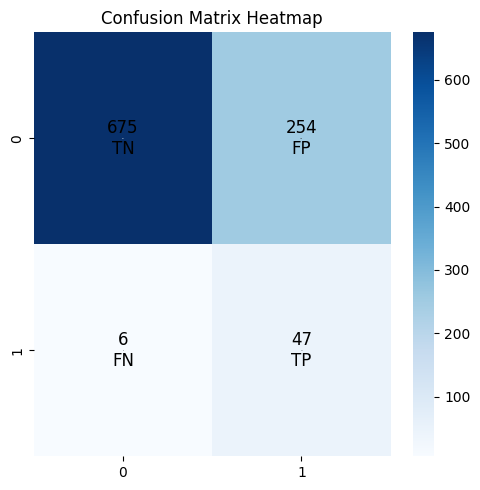

In [3]:
clf = LogisticRegression(max_iter=10000,class_weight='balanced')
clf.fit(X_train, y_train)

y_proba = clf.predict_proba(X_test)[:, 1]

# Trobar el millor threshold que maximitza l'accuracy i el recall
best_threshold = 0.0
best_score = 0.0

for threshold in np.arange(0.0, 1.0, 0.001):
    y_pred_temp = (y_proba >= threshold).astype(int)
    accuracy_temp, precision_temp, recall_temp, f1_temp, _ = metrics(y_test, y_pred_temp)
    score = accuracy_temp + recall_temp  # Combinar accuracy i recall en un sol score

    if score > best_score:
        best_score = score
        best_threshold = threshold

print(f"Millor threshold: {best_threshold}, Millor score: {best_score}")

# Generar les prediccions amb el millor threshold
y_pred = (y_proba >= best_threshold).astype(int)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

## ROC Curve i AUC

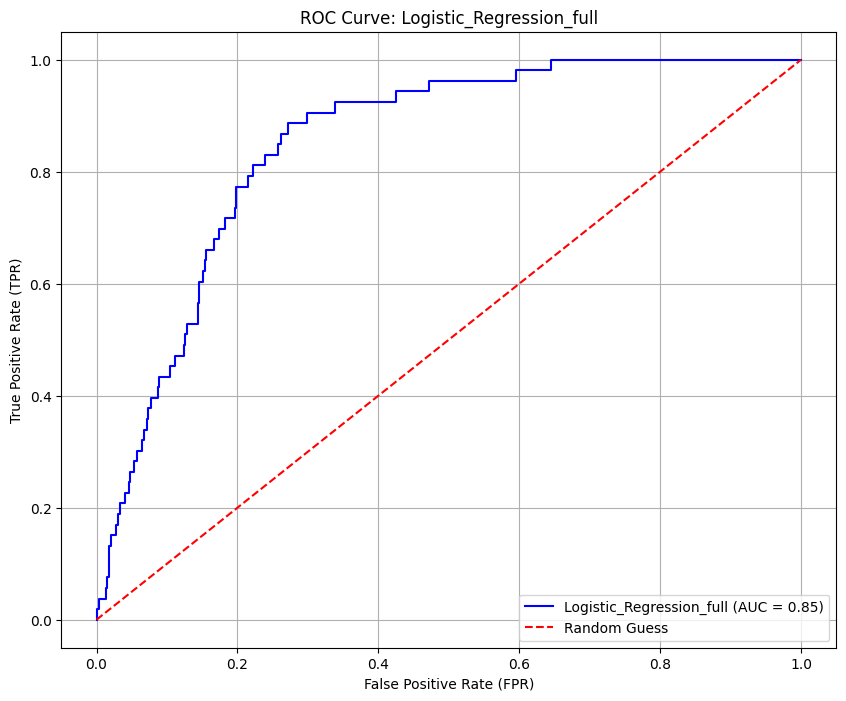

Logistic_Regression_full AUC Score: 0.85


In [4]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="Logistic_Regression_full")

## Visualització dels factors més importants pel model

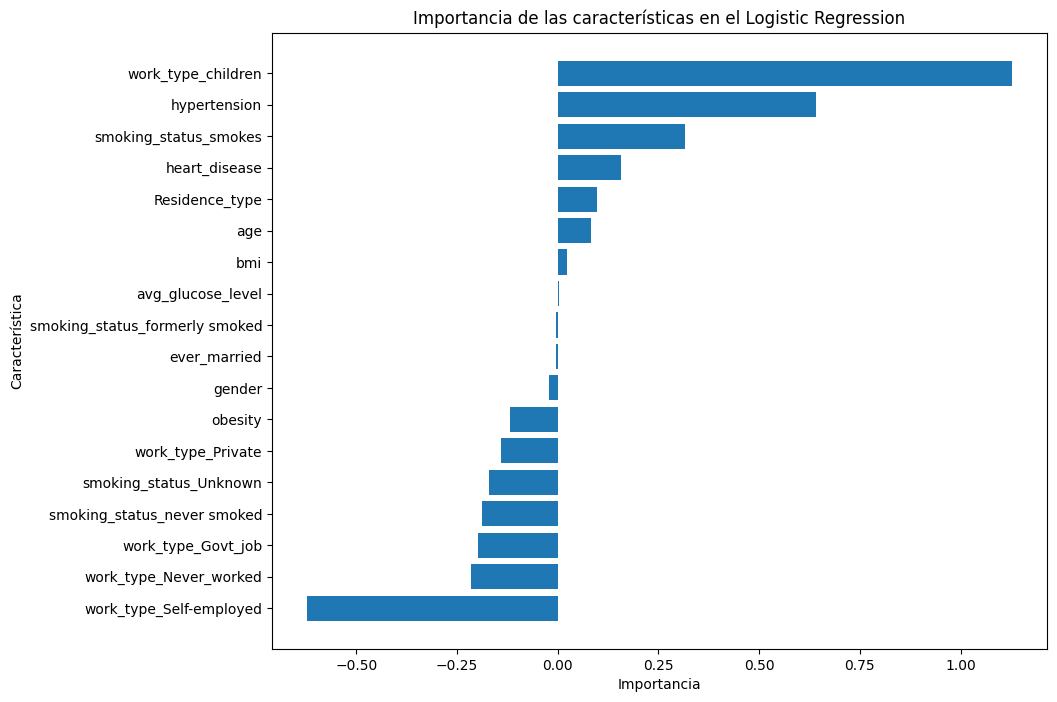

In [5]:
feature_importances = clf.coef_[0]

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

# compute importances
model_fi = permutation_importance(clf, X, y)
model_fi['importances_mean']

# create a dataframe with feature importances
fi_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_fi['importances_mean']
})

# sort the dataframe by importance
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# print the sorted feature importances
for index, row in fi_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

age: 0.060350448247758794
work_type_children: 0.02624286878565609
work_type_Self-employed: 0.005297473512632456
work_type_Govt_job: 0.00309698451507745
work_type_Private: 0.002607986960065234
obesity: 0.002078239608802002
smoking_status_never smoked: 0.000570497147514315
heart_disease: 0.0004482477587612221
ever_married: 0.00040749796251020597
smoking_status_formerly smoked: 0.00020374898125508079
work_type_Never_worked: -8.149959250203231e-05
gender: -0.00044824775876117773
hypertension: -0.0005297473512632323
Residence_type: -0.0005704971475142484
smoking_status_Unknown: -0.0024449877750611026
smoking_status_smokes: -0.002852485737571309
avg_glucose_level: -0.0039934800325998054
bmi: -0.009087204563977158


## Eliminació d'alguns factors

Prova per a evaluar si es poden generar prediccions sense dades mèdiques, més accessibles per a la població general.

Millor threshold: 0.455, Millor score: 1.3928447911462936
Accuracy: 0.5438
Precision: 0.0928
Recall: 0.8491
F1 Score: 0.1673


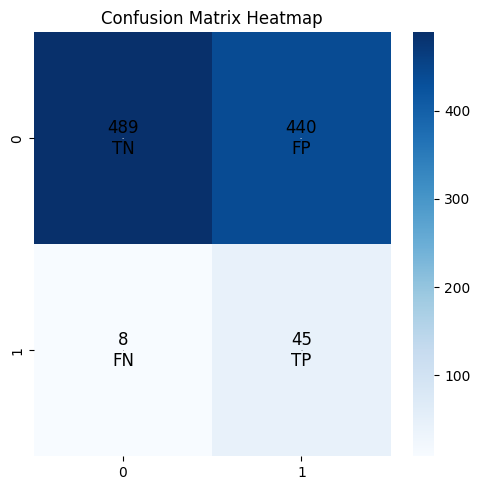

In [7]:
X,Y = load_data(datafile)
X,y = extreure_columnes(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000, class_weight="balanced")
clf.fit(X_train, y_train)

y_proba = clf.predict_proba(X_test)[:, 1]

# Trobar el millor threshold que maximitza l'accuracy i el recall
best_threshold = 0.0
best_score = 0.0

for threshold in np.arange(0.0, 1.0, 0.001):
    y_pred_temp = (y_proba >= threshold).astype(int)
    accuracy_temp, precision_temp, recall_temp, f1_temp, _ = metrics(y_test, y_pred_temp)
    score = accuracy_temp + recall_temp  # Combinar accuracy i recall en un sol score

    if score > best_score:
        best_score = score
        best_threshold = threshold

print(f"Millor threshold: {best_threshold}, Millor score: {best_score}")

# Generar les prediccions amb el millor threshold
y_pred = (y_proba >= best_threshold).astype(int)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

## ROC Curve i AUC

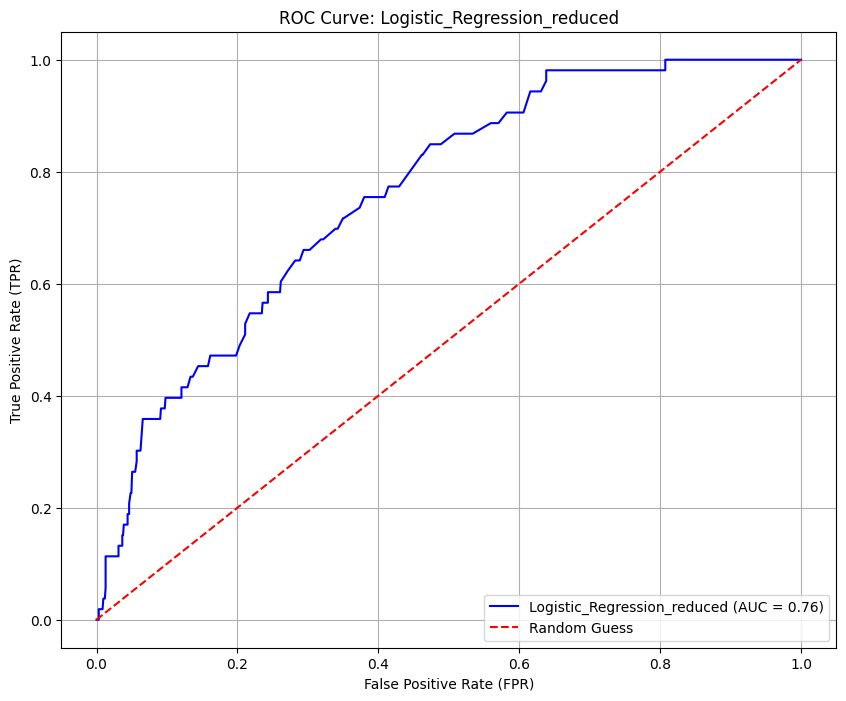

Logistic_Regression_reduced AUC Score: 0.76


In [8]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="Logistic_Regression_reduced")